### Checking for least difference in means

total .pkl files in /balanced_distribution: 846


/tmp/ipykernel_2111412/3248552902.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['','mean', 'std', 'min', 'max', 'p1', 'p99'], rotation=45, ha="right")


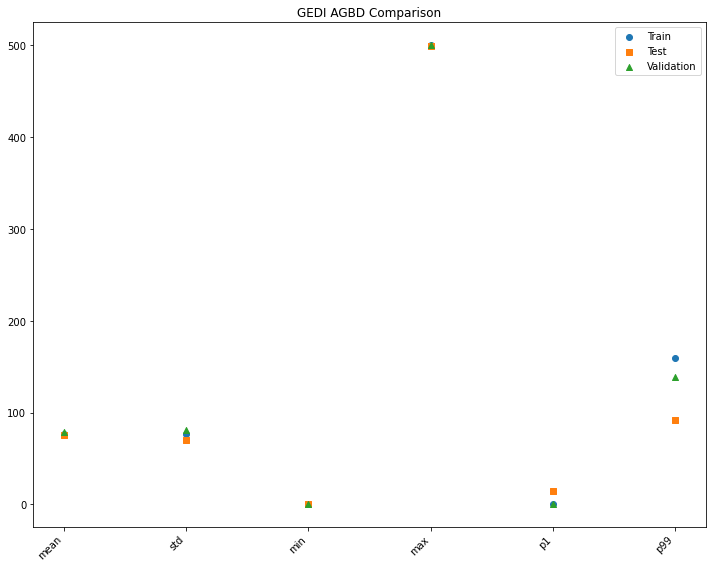

best seed: 24


In [1]:
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np

# Load the data from the pickle files
def load_data(pickle_file_path):
    with open(pickle_file_path, "rb") as file:
        data = pickle.load(file)
    # print(data['GEDI'].keys())  # This will print the keys to ensure 'agbd' is present
    return data['GEDI']['agbd']  # Return only 'agbd' values

min_range = np.inf
best_seed = -1

print("total .pkl files in /balanced_distribution: " + str(len(os.listdir("balanced_distribution"))))
for i in range(int(len(os.listdir("balanced_distribution"))/3)):
    train = f'statistics_{i}_train.pkl'
    test = f'statistics_{i}_test.pkl'
    validation = f'statistics_{i}_val.pkl'
    # Load each dataset
    gedi_data_train = load_data("balanced_distribution/"+train)
    gedi_data_test = load_data("balanced_distribution/"+test)
    gedi_data_validation = load_data("balanced_distribution/"+validation)
    if max(gedi_data_train['mean'],gedi_data_test['mean'],gedi_data_validation['mean'])-min(gedi_data_train['mean'],gedi_data_test['mean'],gedi_data_validation['mean']) < min_range:
        min_range = max(gedi_data_train['mean'],gedi_data_test['mean'],gedi_data_validation['mean'])-min(gedi_data_train['mean'],gedi_data_test['mean'],gedi_data_validation['mean'])
        best_data_train = gedi_data_train
        best_data_test = gedi_data_test
        best_data_validation = gedi_data_validation
        best_seed = i

def plot_combined_scatter(ax, data_list, labels, title):
    markers = ['o', 's', '^']  # Different markers for each dataset
    for data, label, marker in zip(data_list, labels, markers):
        # If 'data' is a dictionary, extract values for plotting
        if isinstance(data, dict):
            values = list(data.values())
        else:
            values = data  # If 'data' is already a list or similar iterable of numeric values
        x_positions = range(len(values))  # X positions for each data point
        ax.scatter(x_positions, values, label=label, marker=marker)
    ax.set_xticklabels(['','mean', 'std', 'min', 'max', 'p1', 'p99'], rotation=45, ha="right")
    ax.set_title(title)
    ax.legend()

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data
plot_combined_scatter(ax, [best_data_train, best_data_test, best_data_validation], ['Train', 'Test', 'Validation'], 'GEDI AGBD Comparison')

plt.tight_layout()
plt.show()
print("best seed: " + str(best_seed))

### analyzing single file

dict_keys(['agbd', 'agbd_se', 'rh98', 'date'])
dict_keys(['agbd', 'agbd_se', 'rh98', 'date'])
dict_keys(['agbd', 'agbd_se', 'rh98', 'date'])


/tmp/ipykernel_1889333/2225305091.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['','mean', 'std', 'min', 'max', 'p1', 'p99'], rotation=45, ha="right")


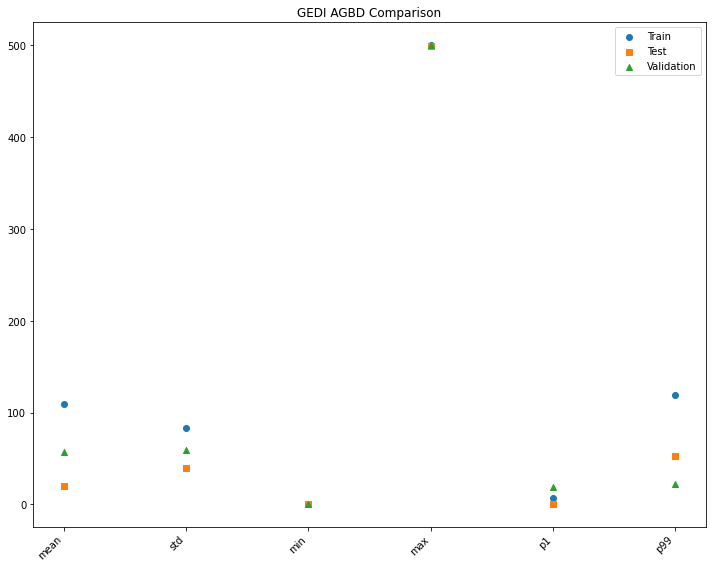

In [3]:
import matplotlib.pyplot as plt
import pickle

# Load the data from the pickle files
def load_data(pickle_file_path):
    with open(pickle_file_path, "rb") as file:
        data = pickle.load(file)
    print(data['GEDI'].keys())  # This will print the keys to ensure 'agbd' is present
    return data['GEDI']['agbd']  # Return only 'agbd' values

# Load each dataset
gedi_data_train = load_data("statistics_train_set_test.pkl")
gedi_data_test = load_data("statistics_test_set_test.pkl")
gedi_data_validation = load_data("statistics_validation_set_test.pkl")

def plot_combined_scatter(ax, data_list, labels, title):
    markers = ['o', 's', '^']  # Different markers for each dataset
    for data, label, marker in zip(data_list, labels, markers):
        # If 'data' is a dictionary, extract values for plotting
        if isinstance(data, dict):
            values = list(data.values())
        else:
            values = data  # If 'data' is already a list or similar iterable of numeric values
        x_positions = range(len(values))  # X positions for each data point
        ax.scatter(x_positions, values, label=label, marker=marker)
    ax.set_xticklabels(['','mean', 'std', 'min', 'max', 'p1', 'p99'], rotation=45, ha="right")
    ax.set_title(title)
    ax.legend()

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data
plot_combined_scatter(ax, [gedi_data_train, gedi_data_test, gedi_data_validation], ['Train', 'Test', 'Validation'], 'GEDI AGBD Comparison')

plt.tight_layout()
plt.show()

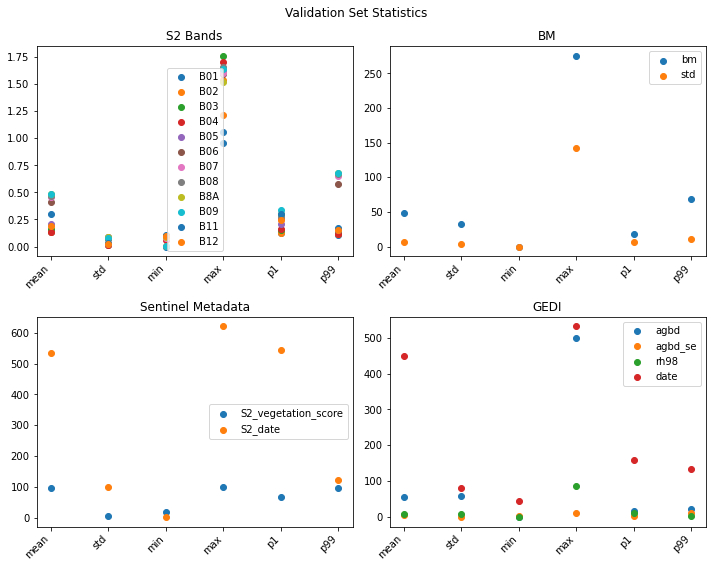

In [16]:
import pickle
import matplotlib.pyplot as plt

# Specify the path to the pickle file
pickle_file_path = "statistics_validation_set_test.pkl"

# Open the pickle file in read mode
with open(pickle_file_path, "rb") as file:
    # Load the pickle file
    data = pickle.load(file)

# Extract the required data from the dictionary
s2_bands_data = data['S2_bands']
bm_data = data['BM']
sentinel_metadata_data = data['Sentinel_metadata']
gedi_data = data['GEDI']

# Visualize the data
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Helper function to plot with x-axis labels
def plot_with_labels(ax, data, title):
    keys = list(data.keys())
    for key in keys:
        ax.plot(range(len(data[key])), list(data[key].values()), label=key)
    ax.set_xticks(range(len(data[keys[0]])))
    ax.set_xticklabels(list(data[keys[0]].keys()), rotation=45, ha="right")
    ax.set_title(title)
    ax.legend()

def plot_with_scatter(ax, data, title):
    keys = list(data.keys())
    for i, key in enumerate(keys):
        x_positions = range(len(data[key]))  # X positions for each data point
        ax.scatter(x_positions, list(data[key].values()), label=key)
    ax.set_xticks(range(len(data[keys[0]])))
    ax.set_xticklabels(list(data[keys[0]].keys()), rotation=45, ha="right")
    ax.set_title(title)
    ax.legend()

plot_with_scatter(axs[0, 0], s2_bands_data, 'S2 Bands')
plot_with_scatter(axs[0, 1], bm_data, 'BM')
plot_with_scatter(axs[1, 0], sentinel_metadata_data, 'Sentinel Metadata')
plot_with_scatter(axs[1, 1], gedi_data, 'GEDI')


fig.suptitle('Validation Set Statistics')
# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

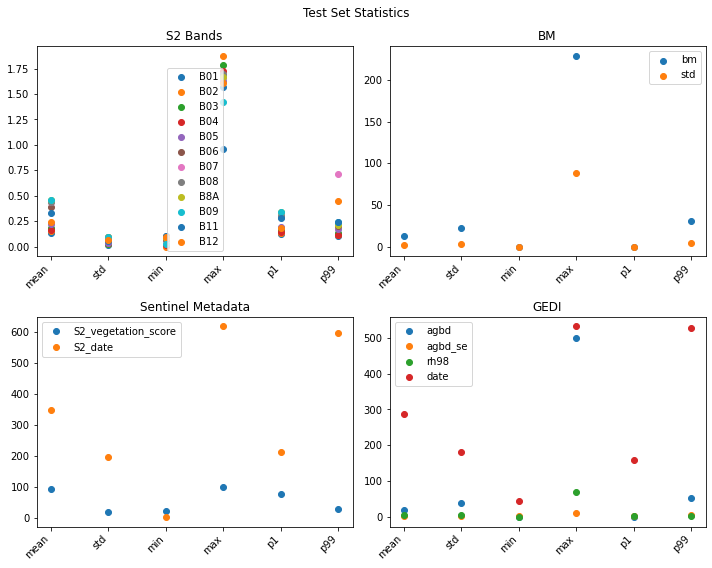

In [17]:
import pickle
import matplotlib.pyplot as plt

# Specify the path to the pickle file
pickle_file_path = "statistics_test_set_test.pkl"

# Open the pickle file in read mode
with open(pickle_file_path, "rb") as file:
    # Load the pickle file
    data = pickle.load(file)

# Extract the required data from the dictionary
s2_bands_data = data['S2_bands']
bm_data = data['BM']
sentinel_metadata_data = data['Sentinel_metadata']
gedi_data = data['GEDI']

# Visualize the data
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Helper function to plot with x-axis labels
def plot_with_labels(ax, data, title):
    keys = list(data.keys())
    for key in keys:
        ax.plot(range(len(data[key])), list(data[key].values()), label=key)
    ax.set_xticks(range(len(data[keys[0]])))
    ax.set_xticklabels(list(data[keys[0]].keys()), rotation=45, ha="right")
    ax.set_title(title)
    ax.legend()

def plot_with_scatter(ax, data, title):
    keys = list(data.keys())
    for i, key in enumerate(keys):
        x_positions = range(len(data[key]))  # X positions for each data point
        ax.scatter(x_positions, list(data[key].values()), label=key)
    ax.set_xticks(range(len(data[keys[0]])))
    ax.set_xticklabels(list(data[keys[0]].keys()), rotation=45, ha="right")
    ax.set_title(title)
    ax.legend()

plot_with_scatter(axs[0, 0], s2_bands_data, 'S2 Bands')
plot_with_scatter(axs[0, 1], bm_data, 'BM')
plot_with_scatter(axs[1, 0], sentinel_metadata_data, 'Sentinel Metadata')
plot_with_scatter(axs[1, 1], gedi_data, 'GEDI')


plt.suptitle('Test Set Statistics')
# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

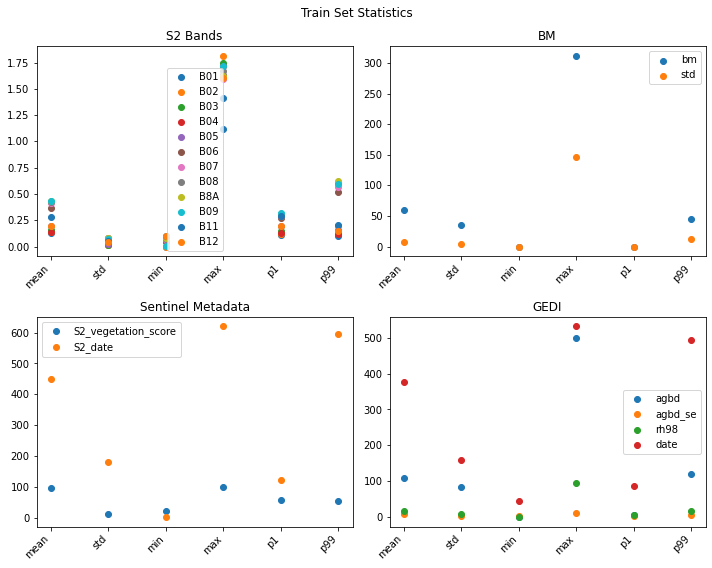

In [18]:
import pickle
import matplotlib.pyplot as plt

# Specify the path to the pickle file
pickle_file_path = "statistics_train_set_test.pkl"

# Open the pickle file in read mode
with open(pickle_file_path, "rb") as file:
    # Load the pickle file
    data = pickle.load(file)

# Extract the required data from the dictionary
s2_bands_data = data['S2_bands']
bm_data = data['BM']
sentinel_metadata_data = data['Sentinel_metadata']
gedi_data = data['GEDI']

# Visualize the data
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Helper function to plot with x-axis labels
def plot_with_labels(ax, data, title):
    keys = list(data.keys())
    for key in keys:
        ax.plot(range(len(data[key])), list(data[key].values()), label=key)
    ax.set_xticks(range(len(data[keys[0]])))
    ax.set_xticklabels(list(data[keys[0]].keys()), rotation=45, ha="right")
    ax.set_title(title)
    ax.legend()

def plot_with_scatter(ax, data, title):
    keys = list(data.keys())
    for i, key in enumerate(keys):
        x_positions = range(len(data[key]))  # X positions for each data point
        ax.scatter(x_positions, list(data[key].values()), label=key)
    ax.set_xticks(range(len(data[keys[0]])))
    ax.set_xticklabels(list(data[keys[0]].keys()), rotation=45, ha="right")
    ax.set_title(title)
    ax.legend()

plot_with_scatter(axs[0, 0], s2_bands_data, 'S2 Bands')
plot_with_scatter(axs[0, 1], bm_data, 'BM')
plot_with_scatter(axs[1, 0], sentinel_metadata_data, 'Sentinel Metadata')
plot_with_scatter(axs[1, 1], gedi_data, 'GEDI')


plt.suptitle('Train Set Statistics')
# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

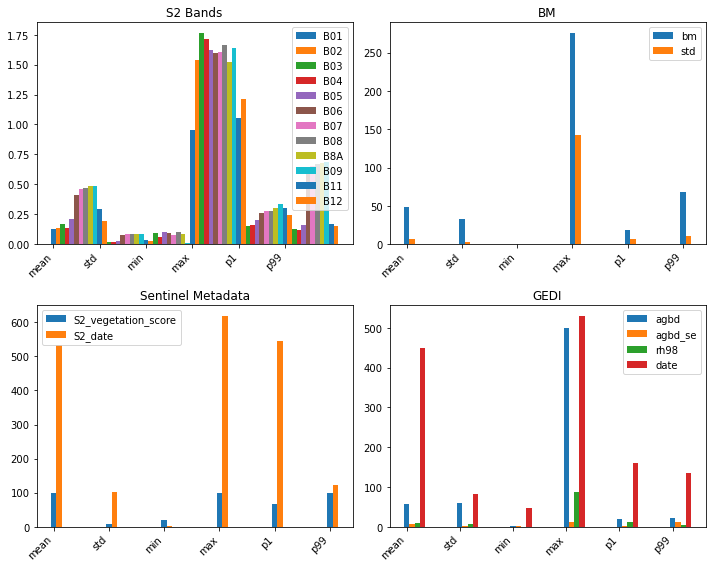

In [13]:
import pickle
import matplotlib.pyplot as plt

# Specify the path to the pickle file
pickle_file_path = "statistics_validation_set_test.pkl"

# Open the pickle file in read mode
with open(pickle_file_path, "rb") as file:
    # Load the pickle file
    data = pickle.load(file)

# Extract the required data from the dictionary
s2_bands_data = data['S2_bands']
bm_data = data['BM']
sentinel_metadata_data = data['Sentinel_metadata']
gedi_data = data['GEDI']

# Visualize the data
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

def plot_with_bars(ax, data, title):
    keys = list(data.keys())
    for i, key in enumerate(keys):
        x_positions = range(len(data[key]))  # X positions for each group of bars
        ax.bar([x + i*0.1 for x in x_positions], list(data[key].values()), width=0.1, label=key)
    ax.set_xticks(range(len(data[keys[0]])))
    ax.set_xticklabels(list(data[keys[0]].keys()), rotation=45, ha="right")
    ax.set_title(title)
    ax.legend()

plot_with_bars(axs[0, 0], s2_bands_data, 'S2 Bands')
plot_with_bars(axs[0, 1], bm_data, 'BM')
plot_with_bars(axs[1, 0], sentinel_metadata_data, 'Sentinel Metadata')
plot_with_bars(axs[1, 1], gedi_data, 'GEDI')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()